In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')


In [3]:
# Load data
df = pd.read_csv('../data/similarity.csv')
df_jpeg = pd.read_csv('../data/jpeg.csv')

# _x = sampling, _y = jpeg
df_merged = pd.merge(df, df_jpeg, on='file_name')

df_merged


,file_name,file_size_original_x,file_size_transcoded_x,compression_ratio_x,transcoding_time_x,similarity,file_size_original_y,file_size_transcoded_y,compression_ratio_y,transcoding_time_y
0,test_small,974331,3190305,3.274354,1133,0.5,974331,155999,0.160109,59
1,test_small,974331,4068011,4.175184,1319,0.8,974331,155999,0.160109,59
2,test_small,974331,4792280,4.918534,1477,1.0,974331,155999,0.160109,59
3,test_small,974331,712,0.000731,244,0.0,974331,155999,0.160109,59
4,test_small,974331,4780575,4.906520,1434,0.9,974331,155999,0.160109,59
...,...,...,...,...,...,...,...,...,...,...
116,test_tiny,245004,108214,0.441683,78,0.1,245004,39110,0.159630,33
117,test_tiny,245004,724,0.002955,32,0.0,245004,39110,0.159630,33
118,test_tiny,245004,767669,3.133292,221,0.3,245004,39110,0.159630,33
119,test_tiny,245004,815512,3.328566,226,0.4,245004,39110,0.159630,33


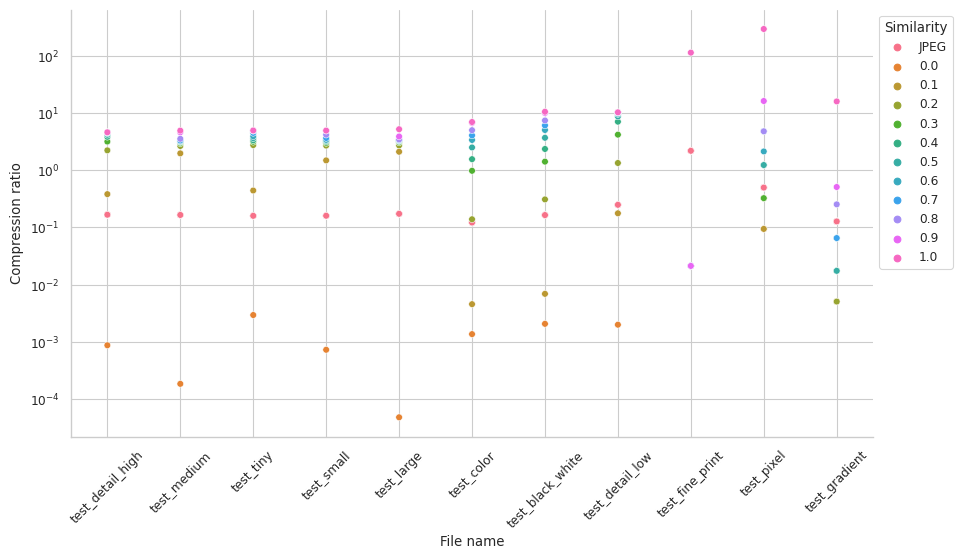

In [17]:
# Compression ratio
df_sorted = df_merged.sort_values(['similarity'])

# JPEG
df_second = df_sorted.loc[:, ('file_name', 'compression_ratio_y')].rename(
    columns={'compression_ratio_y': 'c'})
df_second['class'] = 'jpeg'

# Do this hacky filtering, to get everything apart from 'plain' run
#[(df_sorted['downsampling_algorithm'] != 'ApproxBiLinear') | (df_sorted['upsampling_algorithm'] != 'ApproxBiLinear')]
df_third = df_sorted.loc[:, ('file_name', 'compression_ratio_x', 'similarity')].rename(
    columns={'compression_ratio_x': 'c', 'similarity': 'class'})

# Concatenate data frames
df_concat = pd.concat([df_second, df_third])

# CatmullRomeate a visualization
g = sns.relplot(
    x='file_name',
    y='c',
    data=df_concat,
    hue='class',
    aspect=16/9,
    facet_kws={'legend_out': False},
)

ticks = [0.0625, 0.25, 1, 4, 16, 64, 256]
g.set(xlabel='File name', ylabel='Compression ratio', yscale='log')#, yticks=ticks, yticklabels=ticks)

legend = g.axes.flat[0].get_legend()
legend.set_title('Similarity')
legend.set_bbox_to_anchor((1, 1))
for t, l in zip(legend.texts, ['JPEG']):
    t.set_text(l)

plt.xticks(rotation=45)

plt.show()


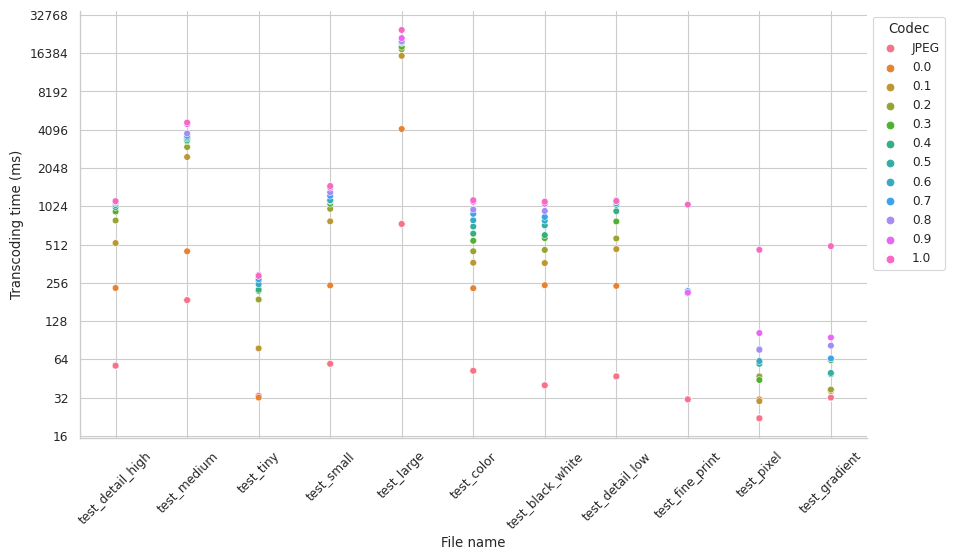

In [15]:
# Transcoding time
df_sorted = df_merged.sort_values('similarity')

df_second = df_sorted.loc[:, ('file_name', 'transcoding_time_y')].rename(
    columns={'transcoding_time_y': 't'})
df_second['class'] = 'jpeg'

df_third = df_sorted.loc[:, ('file_name', 'transcoding_time_x', 'similarity')].rename(
    columns={'transcoding_time_x': 't', 'similarity': 'class'})

# Concatenate data frames
df_concat = pd.concat([df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='t',
    hue='class',
    data=df_concat,
    aspect=16/9,
    facet_kws={'legend_out': False},
)

legend = g.axes.flat[0].get_legend()
legend.set_title('Codec')
legend.set_bbox_to_anchor((1, 1))
for t, l in zip(legend.texts, ['JPEG']):
    t.set_text(l)

ticks = [2**x for x in range(4, 16)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log', yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()